# COMP615 - Assignment Two Notebook (Commented)

## Imports
This cell imports all the necessary libraries for the project.
- `pandas` for data manipulation and reading CSV files.
- `numpy` for numerical operations.
- `matplotlib` and `seaborn` for data visualization.
- `sklearn` for machine learning models, preprocessing, and evaluation metrics.

In [27]:
# Import data analysis and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import tools for model selection and preprocessing from scikit-learn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

# Import machine learning models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB 

# Import tools for evaluating model performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.exceptions import ConvergenceWarning
import warnings

# Configure warnings to be ignored for a cleaner output
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

## Data Loading
Here, we load the training and testing datasets from the CSV files into pandas DataFrames.

In [28]:
# Read the training data into a DataFrame named 'df'
df = pd.read_csv('training.csv')
# Read the testing data into a DataFrame named 'dftest'
dftest = pd.read_csv('testing.csv')

# Part A: K-Nearest Neighbors (KNN) and Naïve Bayes

## A2. Perform Exploratory Data Analysis (EDA)

### Dataset Overview and Integrity Check
This section provides a summary of the datasets and checks for any data quality issues like missing or duplicate values.

In [29]:
# Display a concise summary of the training DataFrame, including data types and non-null values
print("--- Training Set Information ---")
df.info()

# Display a concise summary of the testing DataFrame
print("\n\n--- Testing Set Information ---")
dftest.info()

# Check for and report the total number of missing (null) and duplicate rows
print('\n\n--- Null and Duplicate Value Check ---')
print('\nTraining Set:')
print(f"Total null values: {df.isnull().sum().sum()}")
print(f"Total duplicate values: {df.duplicated().sum()}")

print('\nTesting Set:')
print(f"Total null values: {dftest.isnull().sum().sum()}")
print(f"Total duplicate values: {dftest.duplicated().sum()}")

--- Training Set Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Columns: 148 entries, class to GLCM3_140
dtypes: float64(133), int64(14), object(1)
memory usage: 194.4+ KB


--- Testing Set Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Columns: 148 entries, class to GLCM3_140
dtypes: float64(133), int64(14), object(1)
memory usage: 586.3+ KB


--- Null and Duplicate Value Check ---

Training Set:
Total null values: 0
Total duplicate values: 0

Testing Set:
Total null values: 0
Total duplicate values: 0


### Class Distribution
This plot shows the number of samples for each class in the target variable to see if the dataset is balanced.

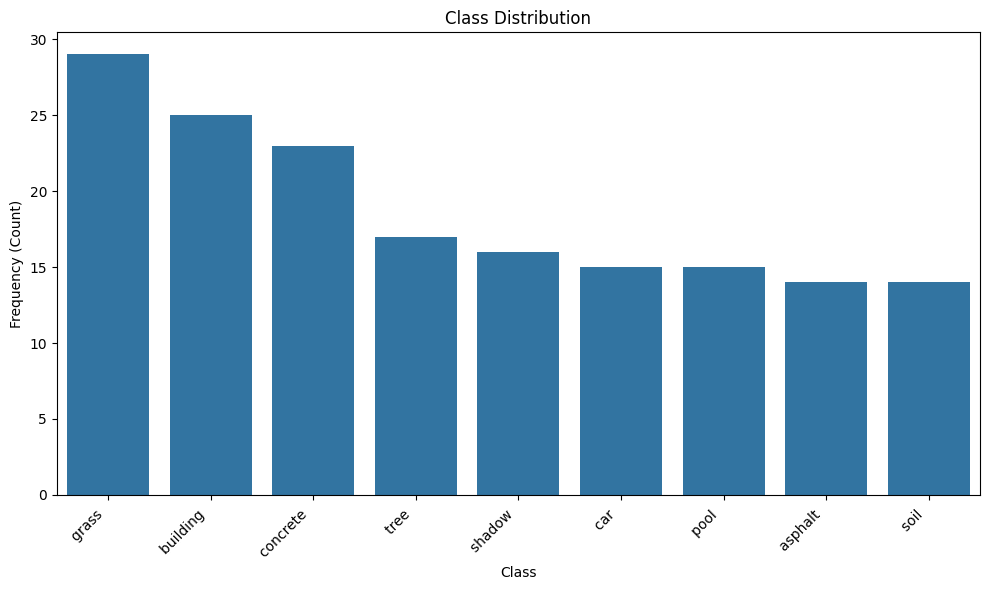

In [30]:
# Set the figure size for the plot
plt.figure(figsize=(10, 6))
# Create a bar plot showing the count of each class
sns.countplot(x='class', data=df, order=df['class'].value_counts().index)
# Set the title and labels for the plot
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency (Count)')
# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
# Adjust layout to prevent labels from overlapping
plt.tight_layout()
# Display the plot
plt.show()

### Data Visualization: Feature Characteristics

#### Histogram of Feature Variances
This histogram shows the distribution of variances for all numerical features. Features with very low variance might not be very informative.

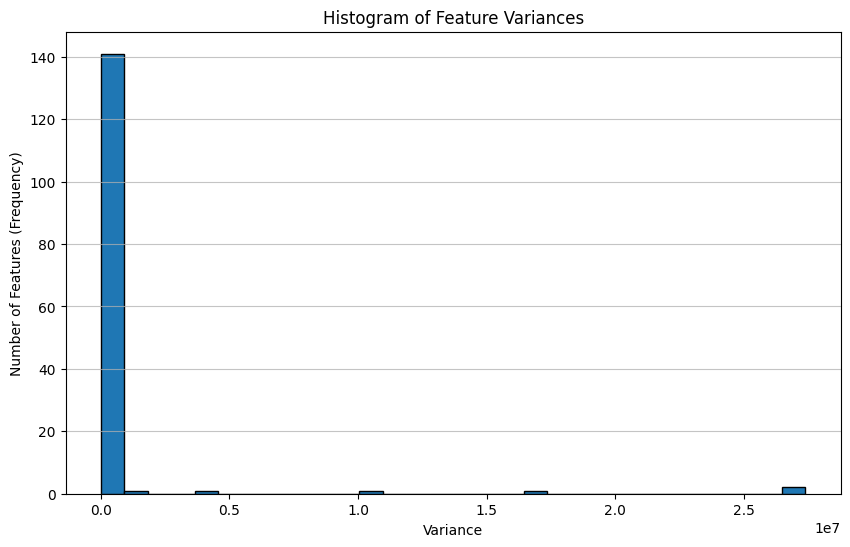

In [31]:
# Create a new DataFrame without the 'class' column to analyze numerical features
numeric_df = df.drop('class', axis=1)
# Calculate the variance for each feature
feature_variances = numeric_df.var()

# Create the histogram plot
plt.figure(figsize=(10, 6))
plt.hist(feature_variances, bins=30, edgecolor='black')
plt.title('Histogram of Feature Variances')
plt.xlabel('Variance')
plt.ylabel('Number of Features (Frequency)')
plt.grid(axis='y', alpha=0.75)
plt.show()

#### Correlation Heatmap
A heatmap visualizes the correlation between features. High correlation (values near 1 or -1) indicates that features are related, which is important to know for certain models.

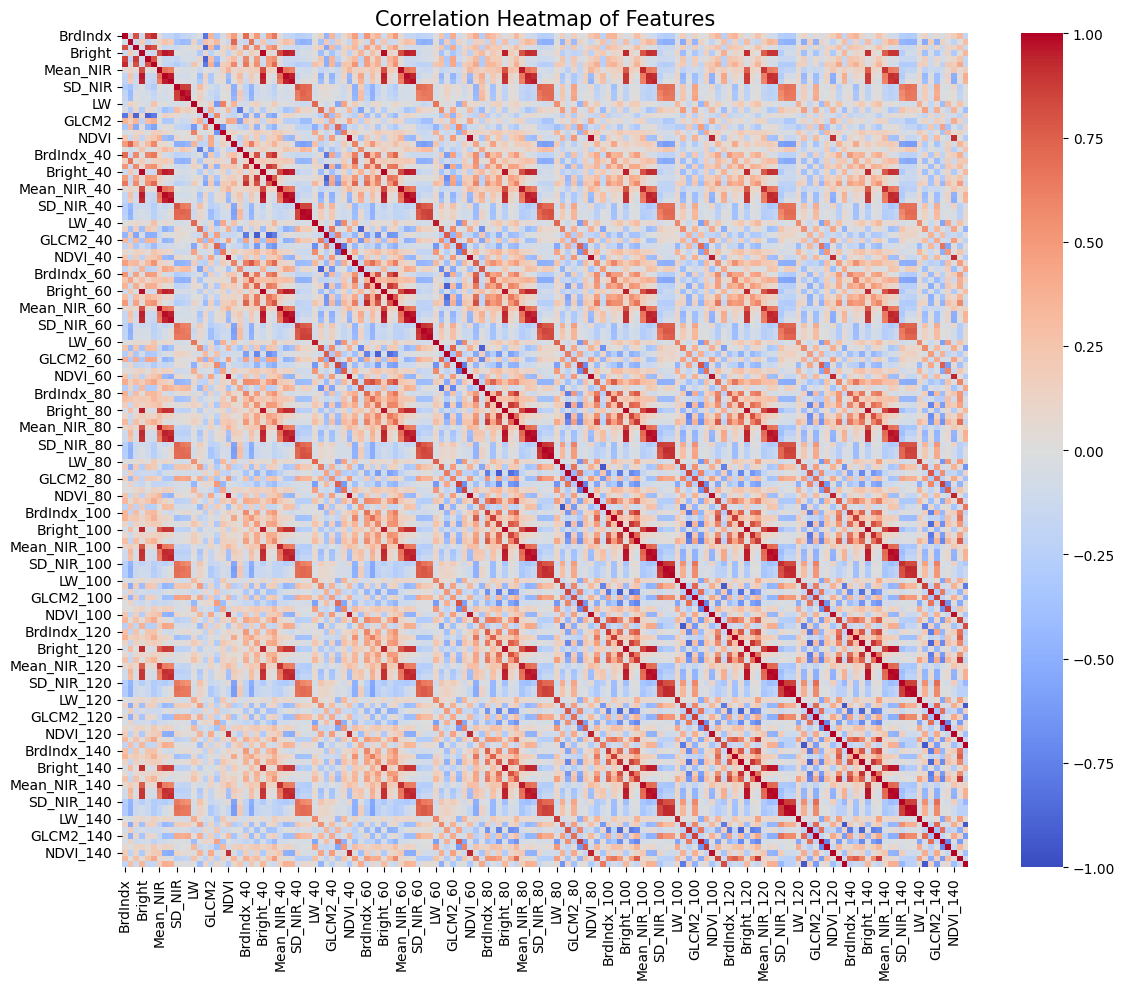

In [32]:
# Calculate the correlation matrix for the numerical features
correlation_matrix = numeric_df.corr()

# Create the heatmap plot
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            annot=False,      # Do not display the correlation values on the map
            cmap='coolwarm',  # Use a color scheme where red is positive and blue is negative correlation
            vmin=-1,          # Set the minimum value for the color scale
            vmax=1,           # Set the maximum value for the color scale
            center=0)         # Center the color scale at zero
plt.title('Correlation Heatmap of Features', fontsize=15)
plt.tight_layout()
plt.show()

#### Boxplots for Selected Features by Class
Boxplots help visualize the distribution of a feature's values for each class. This can show if a feature is good at separating different classes.

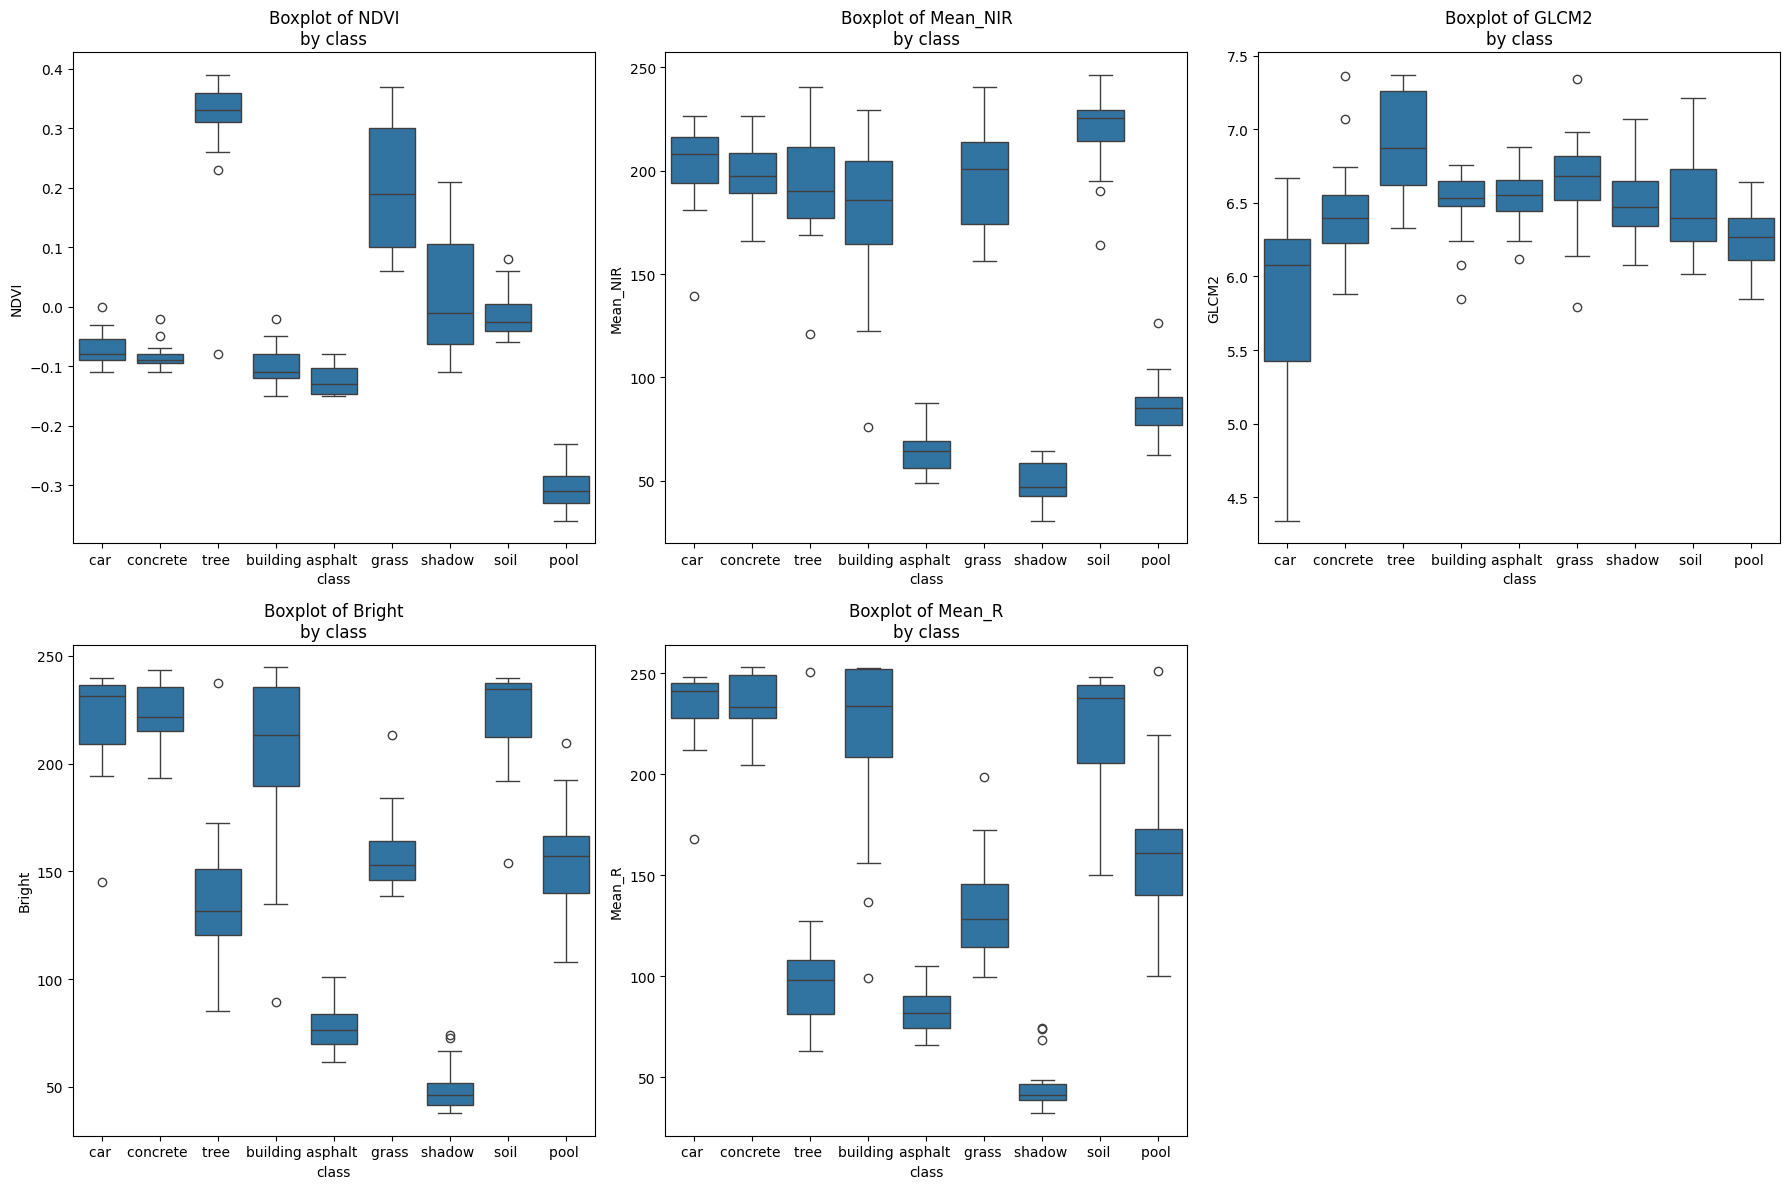

In [33]:
# Define the target column and select a few features to visualize
target_column_name = 'class'
selected_features_for_boxplot = ['NDVI', 'Mean_NIR', 'GLCM2', 'Bright', 'Mean_R']

# Create a grid of boxplots
plt.figure(figsize=(18, 12))
for i, feature_name in enumerate(selected_features_for_boxplot):
   # Create a subplot for each feature
   plt.subplot(2, 3, i + 1)
   sns.boxplot(x=target_column_name, y=feature_name, data=df)
   plt.title(f'Boxplot of {feature_name}\nby {target_column_name}')
   plt.xlabel(target_column_name)
   plt.ylabel(feature_name)

plt.tight_layout()
plt.show()

## A3. Feature Selection and Analysis
This section uses a statistical test (ANOVA F-test) to automatically select the 5 most influential features for predicting the target class.

Top 5 features by F score:
- Mean_NIR
- NDVI
- NDVI_40
- Mean_NIR_60
- NDVI_60


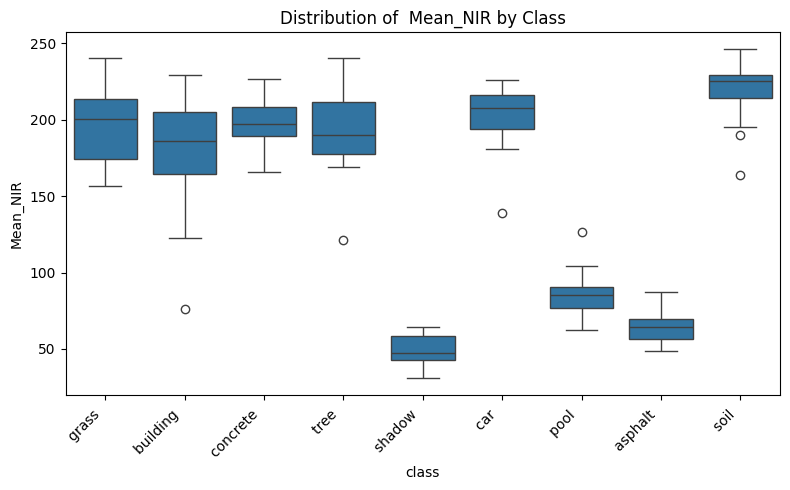

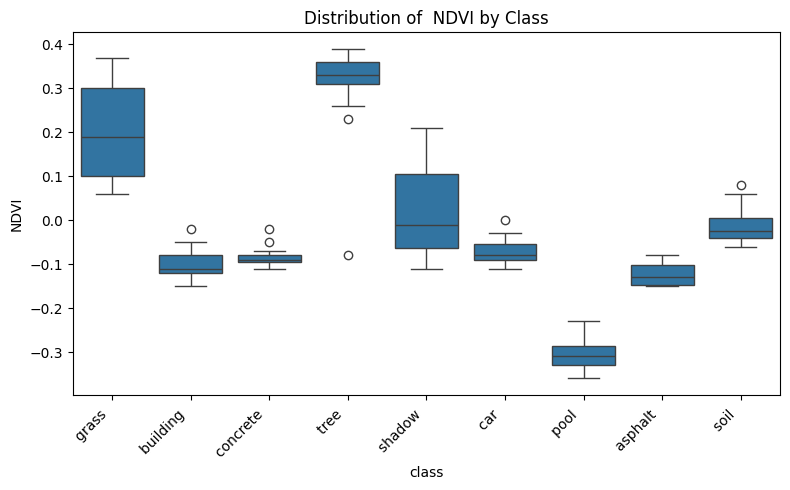

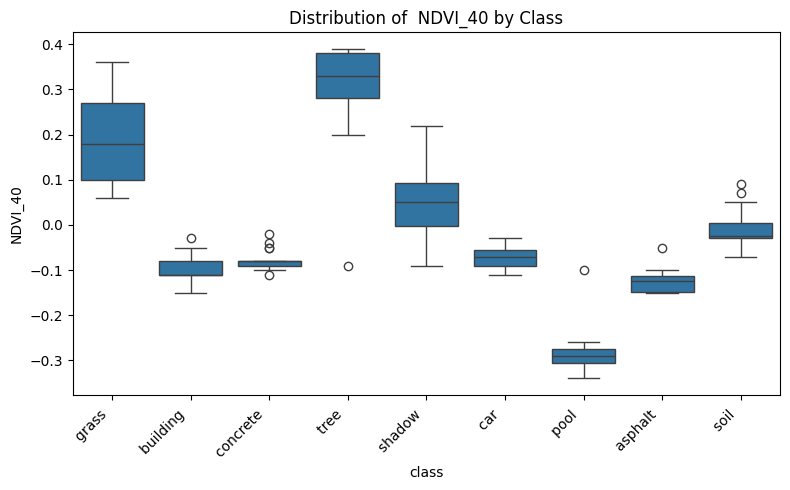

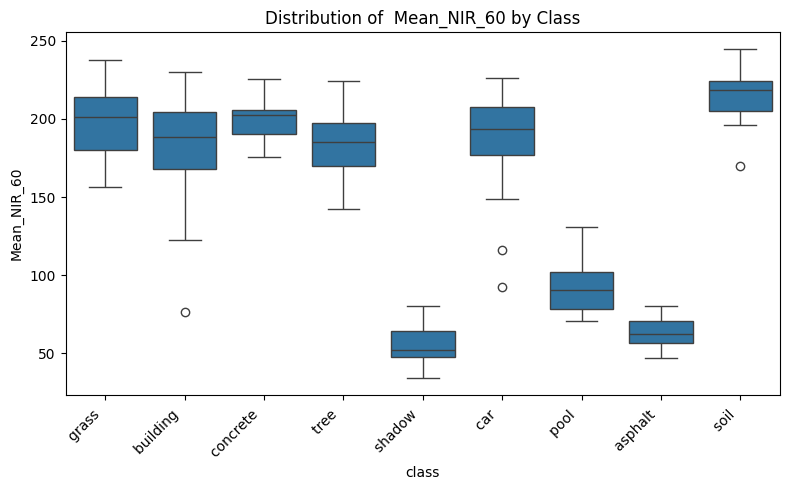

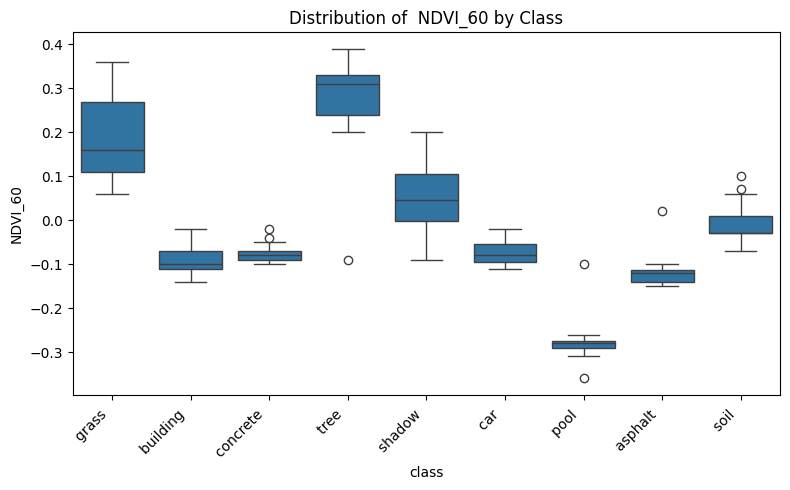

In [34]:
# Separate features (X) and the target variable (y)
X = df.drop('class', axis=1)
y = df['class']

# Encode the categorical target variable 'y' into numerical labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Use SelectKBest to find the top 5 features using the ANOVA F-test (f_classif)
selector = SelectKBest(score_func=f_classif, k=5)
selector.fit(X, y)

# Get the names of the selected features
top_features_names = X.columns[selector.get_support()].tolist()

# Print the names of the top 5 features
print("Top 5 features by F score:")
for name in top_features_names:
    print(f"- {name}")

# Create a temporary DataFrame for plotting the selected features
df_plot_selected = X[top_features_names].copy()
df_plot_selected['class'] = y.reset_index(drop=True)
class_order_for_plot = df['class'].value_counts().index

# Create a boxplot for each of the top 5 features to see how they separate the classes
for feature_name in top_features_names:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='class', y=feature_name, data=df_plot_selected, order=class_order_for_plot)
    plt.title(f'Distribution of  {feature_name} by Class')
    plt.ylabel(f'{feature_name}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Data Preprocessing for Models
Before training the models, we need to prepare the data. This involves separating features from the target and scaling the features. Scaling is important for models like KNN and MLP.

In [35]:
# Separate features (X) from the target (y) for both training and testing sets
X_train = df.drop('class', axis=1)
y_train = df['class']

X_test = dftest.drop('class', axis= 1)
y_test = dftest['class']

# Initialize the StandardScaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)
# Transform the test data using the scaler that was fitted on the training data
X_test_scaled = scaler.transform(X_test)

print(f"Training data scaled. Shape: {X_train_scaled.shape}")
print(f"Test data scaled. Shape: {X_test_scaled.shape}")

Training data scaled. Shape: (168, 147)
Test data scaled. Shape: (507, 147)


## A6. K-Nearest Neighbors (KNN) Model Building and Evaluation

### Finding the Optimal 'k' using Cross-Validation
We test different values for 'k' (the number of neighbors) to find the one that gives the best performance on average, using cross-validation to prevent overfitting.

--- Finding Best K using 5-Fold Cross-Validation ---
k=1, CV Mean Accuracy: 0.7431
k=2, CV Mean Accuracy: 0.7729
k=3, CV Mean Accuracy: 0.7679
k=4, CV Mean Accuracy: 0.7622
k=5, CV Mean Accuracy: 0.7918
k=6, CV Mean Accuracy: 0.7742
k=7, CV Mean Accuracy: 0.7742
k=8, CV Mean Accuracy: 0.7679
k=9, CV Mean Accuracy: 0.7918
k=10, CV Mean Accuracy: 0.7738
k=11, CV Mean Accuracy: 0.7799
k=12, CV Mean Accuracy: 0.7677
k=13, CV Mean Accuracy: 0.7619
k=14, CV Mean Accuracy: 0.7558
k=15, CV Mean Accuracy: 0.7383
k=16, CV Mean Accuracy: 0.7439
k=17, CV Mean Accuracy: 0.7501
k=18, CV Mean Accuracy: 0.7378
k=19, CV Mean Accuracy: 0.7201
k=20, CV Mean Accuracy: 0.7082

Best k based on cross-validation: 5 with CV accuracy: 0.7918


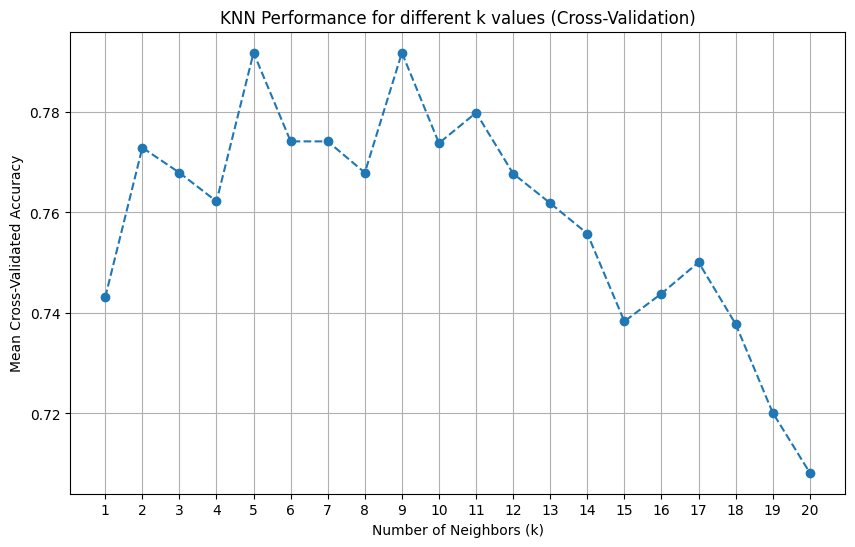

In [36]:
# Define the range of 'k' values to test (from 1 to 20)
k_range = range(1, 21)
# Create an empty list to store the cross-validation scores
cv_scores = []

print("--- Finding Best K using 5-Fold Cross-Validation ---")
# Loop through each k value in the range
for k_val in k_range:
    # Initialize the KNN model with the current k value
    knn = KNeighborsClassifier(n_neighbors=k_val)
    # Perform 5-fold cross-validation and get the accuracy scores
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    # Append the mean of the scores to our list
    cv_scores.append(scores.mean())
    print(f"k={k_val}, CV Mean Accuracy: {scores.mean():.4f}")

# Find the k value that resulted in the highest cross-validation accuracy
best_k_cv = k_range[np.argmax(cv_scores)]
print(f"\nBest k based on cross-validation: {best_k_cv} with CV accuracy: {max(cv_scores):.4f}")

# Plot the accuracy scores for each k value to visualize the result
plt.figure(figsize=(10, 6))
plt.plot(k_range, cv_scores, marker='o', linestyle='dashed')
plt.title('KNN Performance for different k values (Cross-Validation)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

### Final KNN Model Evaluation
Using the best 'k' we found, we train the final KNN model on the entire training set and evaluate its performance on the separate test set.

KNN Model Accuracy (k=5): 0.7239

Classification Report:
              precision    recall  f1-score   support

    asphalt        0.76      0.71      0.74        45
   building        0.86      0.67      0.75        97
        car        0.94      0.81      0.87        21
   concrete        0.72      0.82      0.76        93
      grass        0.65      0.71      0.68        83
       pool        0.79      0.79      0.79        14
     shadow        0.70      0.69      0.70        45
       soil        0.25      0.35      0.29        20
       tree        0.78      0.78      0.78        89

    accuracy                           0.72       507
   macro avg       0.72      0.70      0.71       507
weighted avg       0.74      0.72      0.73       507



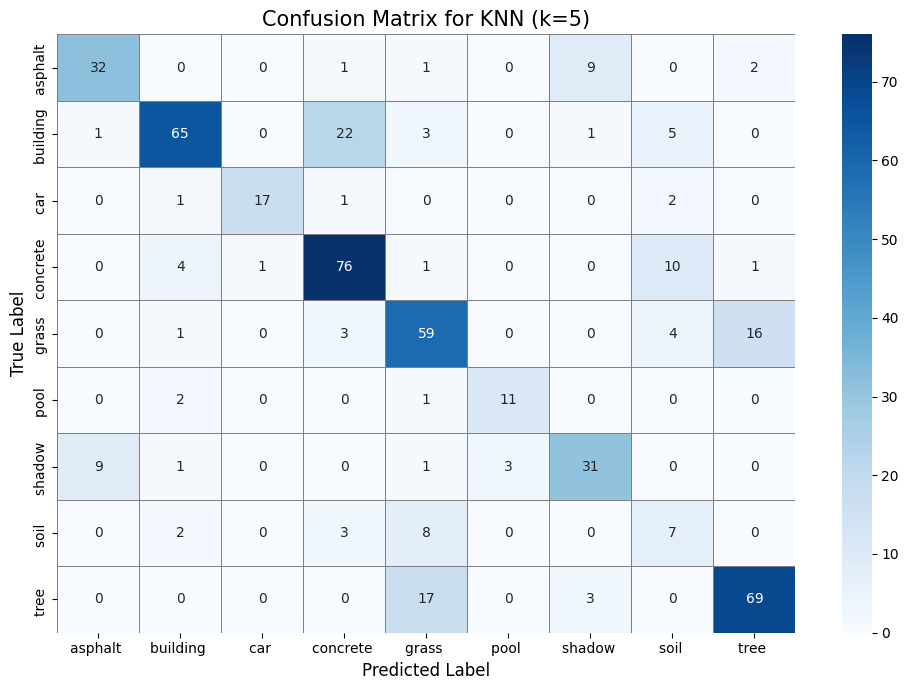

In [37]:
# Set k to the best value found during cross-validation
k = best_k_cv
# Initialize the final KNN model
knn_model = KNeighborsClassifier(n_neighbors=k)

# Train the model on the scaled training data
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_knn = knn_model.predict(X_test_scaled)

# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Model Accuracy (k={k}): {accuracy:.4f}")

# Print a detailed classification report (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

# Get the unique class labels for the confusion matrix
class_labels = np.unique(np.concatenate((y_test, y_pred_knn)))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn, labels=class_labels)

# Create a DataFrame from the confusion matrix for better visualization
cm_df = pd.DataFrame(cm,
                     index = class_labels,
                     columns = class_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df,
            annot=True,      # Show the numbers in each cell
            fmt='d',         # Format numbers as integers
            cmap='Blues',    # Use the 'Blues' color scheme
            linewidths=.5,
            linecolor='gray',
            cbar=True)

plt.title(f'Confusion Matrix for KNN (k={best_k_cv})', fontsize=15)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# Part B: Exploring Artificial Neural Networks

## B2 & B3. Baseline Model (Single Hidden Layer) and Loss Tracking
We use `GridSearchCV` to find the best hyperparameters (number of neurons and iterations) for a single-layer MLP. Then, we train the best model and plot its learning curve to see how training loss and validation accuracy change over time.

--- Part B(b): Finding Best Parameters for Single-Layer MLP ---
--- Starting GridSearchCV to find best hyperparameters ---
Fitting 10 folds for each of 25 candidates, totalling 250 fits

--- Grid Search Results ---
Best parameters found: {'hidden_layer_sizes': (15,), 'max_iter': 200}
Highest 10-fold CV Accuracy: 0.7555

--- Part B(c): Creating and training the optimal model for plotting ---
Final test accuracy of the optimal model: 0.5917
Number of iterations run (due to early stopping): 56


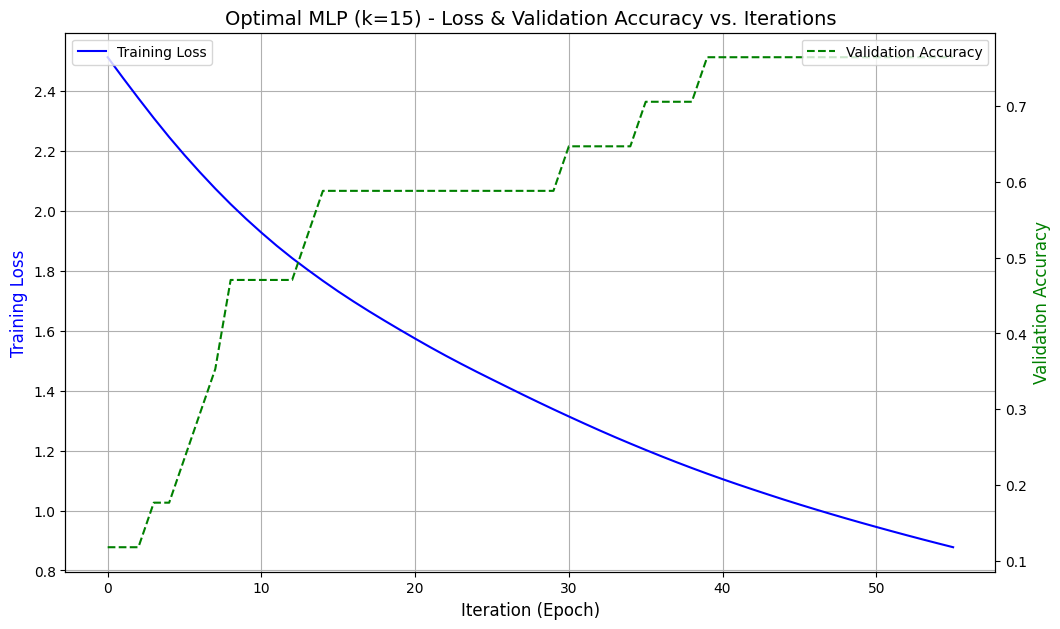

In [38]:
print("--- Part B(b): Finding Best Parameters for Single-Layer MLP ---")

# Define the grid of hyperparameters to search
param_grid = {
    'hidden_layer_sizes': [(k,) for k in range(5, 26, 5)], # Test architectures with one layer of 5, 10, 15, 20, or 25 neurons
    'max_iter': [50, 100, 150, 200, 250]                    # Test different numbers of training iterations
}

# Set up GridSearchCV to automate the hyperparameter search with 10-fold cross-validation
grid_search = GridSearchCV(
    estimator=MLPClassifier(random_state=42),
    param_grid=param_grid,
    cv=10,
    scoring='accuracy',
    n_jobs=-1,  # Use all available CPU cores to speed up the search
    verbose=1   # Print progress updates
)

print("--- Starting GridSearchCV to find best hyperparameters ---")
# Run the search on the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Report the best parameters found by the search
print("\n--- Grid Search Results ---")
best_params_single_layer = grid_search.best_params_
baseline_accuracy = grid_search.best_score_
print(f"Best parameters found: {best_params_single_layer}")
print(f"Highest 10-fold CV Accuracy: {baseline_accuracy:.4f}")

print("\n--- Part B(c): Creating and training the optimal model for plotting ---")

# Encode the target variable to integer labels, which MLPClassifier requires
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Create a new MLP model with the best parameters and enable early stopping
optimal_mlp = MLPClassifier(
    **best_params_single_layer, # Use the best parameters found (e.g., {'hidden_layer_sizes': (15,), 'max_iter': 200})
    random_state=42,
    early_stopping=True,        # Enable early stopping to prevent overfitting
    validation_fraction=0.1,    # Use 10% of training data for validation
    n_iter_no_change=15         # Stop if validation score doesn't improve for 15 consecutive iterations
)

# Train the final, optimal model
optimal_mlp.fit(X_train_scaled, y_train_encoded)

# Evaluate and print the final model's performance on the test set
final_accuracy = optimal_mlp.score(X_test_scaled, y_test_encoded)
print(f"Final test accuracy of the optimal model: {final_accuracy:.4f}")
print(f"Number of iterations run (due to early stopping): {optimal_mlp.n_iter_}")

# Create a plot to visualize the training process
plt.figure(figsize=(12, 7))

# Plot the training loss on the primary y-axis
plt.plot(optimal_mlp.loss_curve_, label='Training Loss', color='blue')
k_mlp = optimal_mlp.hidden_layer_sizes[0]
plt.title(f'Optimal MLP (k={k_mlp}) - Loss & Validation Accuracy vs. Iterations', fontsize=14)
plt.xlabel('Iteration (Epoch)', fontsize=12)
plt.ylabel('Training Loss', color='blue', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)

# Create a second y-axis to plot the validation accuracy on the same graph
ax2 = plt.gca().twinx()
ax2.plot(optimal_mlp.validation_scores_, label='Validation Accuracy', color='green', linestyle='--')
ax2.set_ylabel('Validation Accuracy', color='green', fontsize=12)
ax2.legend(loc='upper right')

plt.show()

## B4. Experimenting with Two Hidden Layers
This section tests if a deeper network (two hidden layers) can achieve better performance than the single-layer baseline. We split the total number of neurons from the best single-layer model across two layers in all possible ways.

In [39]:
# Get the optimal number of neurons and iterations from the single-layer experiment
best_k_from_single = best_params_single_layer['hidden_layer_sizes'][0]
iterations_to_use = best_params_single_layer['max_iter']

print(f"\n--- Part B(d): Experimenting with Two Hidden Layers ---")
print(f"Total neurons to distribute: {best_k_from_single}")
print(f"Iterations for each model: {iterations_to_use}\n")

# Create a list to store the results of each two-layer configuration
results_table_data = []

# Loop through all possible ways to split the neurons between two layers
for n2_neurons in range(1, best_k_from_single):
    # Calculate the number of neurons for the first layer
    n1_neurons = best_k_from_single - n2_neurons
    # Define the two-layer architecture
    layer_config = (n1_neurons, n2_neurons)

    # Initialize the MLP model with the two-layer configuration
    mlp_model = MLPClassifier(
        hidden_layer_sizes=layer_config,
        max_iter=iterations_to_use,
        random_state=42
    )
    
    # Evaluate this configuration using 10-fold cross-validation
    cv_scores = cross_val_score(mlp_model, X_train_scaled, y_train, cv=10, scoring='accuracy', n_jobs=1)
    # Calculate the average accuracy
    avg_accuracy = np.mean(cv_scores)

    # Store the results
    results_table_data.append({
        'config': f"({n1_neurons}, {n2_neurons})",
        'accuracy': avg_accuracy
    })
    print(f"Configuration: {layer_config}, Avg 10-fold CV Accuracy: {avg_accuracy:.4f}")


# Print a summary table of the results
print("\n--- Summary Table for Two-Layer Configurations ---")
print("---------------------------------------------")
print("| Neuron Combination | Avg CV Accuracy    |")
print("|--------------------|--------------------|")

best_two_layer_config = ""
best_two_layer_accuracy = 0.0

for result in results_table_data:
    print(f"| {result['config']:<18} | {result['accuracy']:.4f}           |")
    # Keep track of the best-performing two-layer configuration
    if result['accuracy'] > best_two_layer_accuracy:
        best_two_layer_accuracy = result['accuracy']
        best_two_layer_config = result['config']

print("---------------------------------------------")

# Compare the best two-layer model with the best single-layer model
print("\n--- Final Comparison ---")
print(f"Best single-layer baseline accuracy (from Part B(b)): {baseline_accuracy:.4f}")
print(f"Best two-layer configuration found: {best_two_layer_config} with an accuracy of {best_two_layer_accuracy:.4f}")

if best_two_layer_accuracy > baseline_accuracy:
    print("Conclusion: Adding a second hidden layer provided an improvement.")
else:
    print("Conclusion: The single-layer architecture remains the best performing model.")


--- Part B(d): Experimenting with Two Hidden Layers ---
Total neurons to distribute: 15
Iterations for each model: 200

Configuration: (14, 1), Avg 10-fold CV Accuracy: 0.2379
Configuration: (13, 2), Avg 10-fold CV Accuracy: 0.4235
Configuration: (12, 3), Avg 10-fold CV Accuracy: 0.4871
Configuration: (11, 4), Avg 10-fold CV Accuracy: 0.6246
Configuration: (10, 5), Avg 10-fold CV Accuracy: 0.5938
Configuration: (9, 6), Avg 10-fold CV Accuracy: 0.6426
Configuration: (8, 7), Avg 10-fold CV Accuracy: 0.7066
Configuration: (7, 8), Avg 10-fold CV Accuracy: 0.5643
Configuration: (6, 9), Avg 10-fold CV Accuracy: 0.7199
Configuration: (5, 10), Avg 10-fold CV Accuracy: 0.6551
Configuration: (4, 11), Avg 10-fold CV Accuracy: 0.5585
Configuration: (3, 12), Avg 10-fold CV Accuracy: 0.4882
Configuration: (2, 13), Avg 10-fold CV Accuracy: 0.4338
Configuration: (1, 14), Avg 10-fold CV Accuracy: 0.3684

--- Summary Table for Two-Layer Configurations ---
---------------------------------------------
|